# Medicine Recommendation System  

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\Internship_Projects\MedicineRecommendationSystem-main\datasets\drugsComTest_raw.csv')

In [3]:
# Data Exploration
print("Data Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Info:\n", df.info())

Data Shape: (53766, 7)
Missing Values:
 uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB
Data Info:
 None


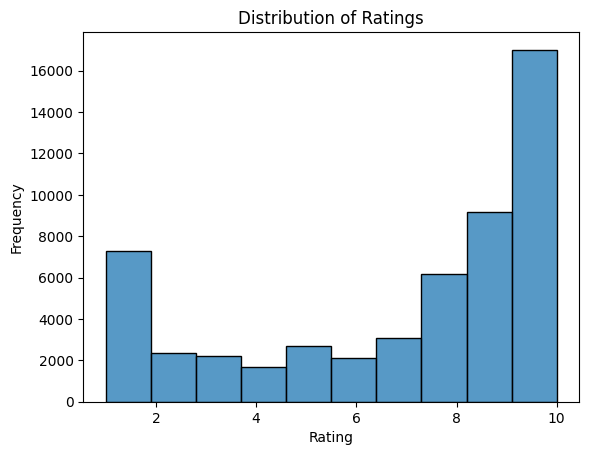

In [4]:

# Distribution of ratings
sns.histplot(data=df, x='rating', bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

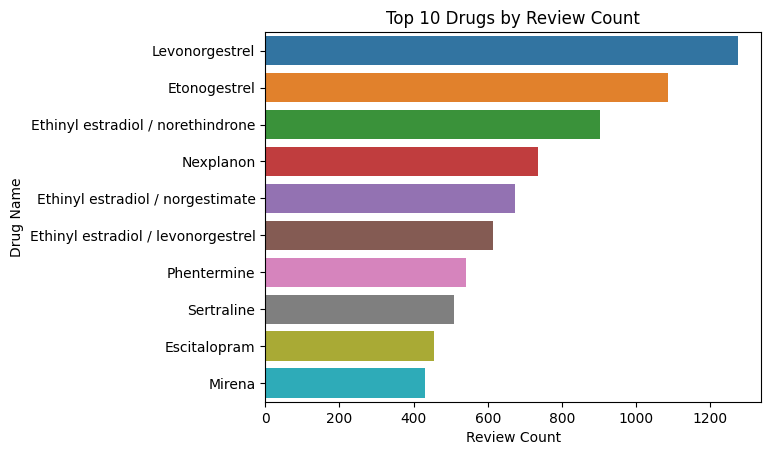

In [5]:
# Top 10 drugs by review count
top_drugs = df['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.xlabel('Review Count')
plt.ylabel('Drug Name')
plt.title('Top 10 Drugs by Review Count')
plt.show()

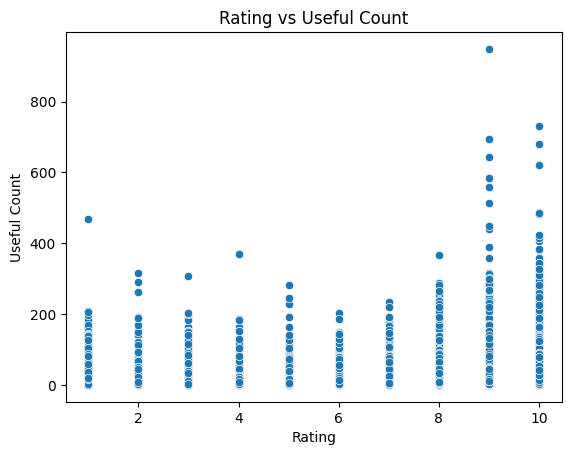

In [6]:
# Scatterplot of Rating vs Useful Count
sns.scatterplot(data=df, x='rating', y='usefulCount')
plt.title('Rating vs Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

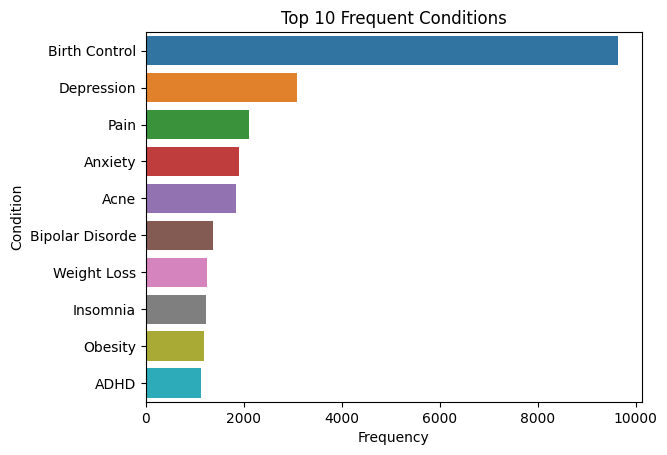

In [7]:

# Top 10 frequent conditions
top_conditions = df['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title('Top 10 Frequent Conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

In [8]:
# Define a function to get medications for a specific condition
def get_medications_for_condition(condition):
    medications = df[df['condition'] == condition]['drugName'].unique()
    print("Medications for condition '{}':\n{}".format(condition, medications))

# Example usage of the function
get_medications_for_condition('Birth Control')

# Model Training
df = df[['drugName', 'condition']]
df.dropna(subset=['condition'], inplace=True)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])

# User input for health condition
user_condition = input("Enter your health condition: ")

# Transform user input using the same TF-IDF vectorizer
user_condition_tfidf = tfidf_vectorizer.transform([user_condition])

# Compute cosine similarity between user input and all conditions
similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)

# Get indices of top 10 most similar conditions
top_indices = similarity_scores.argsort()[0][::-1][:10]

# Get the names of top recommended medicines for the user's condition
top_medicines = df['drugName'].iloc[top_indices]

print("Top 10 recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)

Medications for condition 'Birth Control':
['Cyclafem 1 / 35' 'Copper' 'Levora' 'Blisovi Fe 1 / 20' 'NuvaRing'
 'Aubra' 'Ethinyl estradiol / etonogestrel' 'Microgestin Fe 1.5 / 30'
 'Etonogestrel' 'Ortho Tri-Cyclen Lo' 'Skyla'
 'Ethinyl estradiol / norethindrone' 'ParaGard'
 'Ethinyl estradiol / levonorgestrel' 'Aviane' 'Implanon' 'Levonorgestrel'
 'Ethinyl estradiol / norgestimate' 'Lo Loestrin Fe' 'Yaz' 'Jolessa'
 'Nexplanon' 'Kariva' 'Depo-Provera' 'Safyral'
 'Drospirenone / ethinyl estradiol' 'Microgestin Fe 1 / 20' 'Apri'
 'Ortho Evra' 'Alesse' 'Junel Fe 1 / 20' 'Mirena' 'Tri-Sprintec'
 'Junel Fe 1.5 / 30' 'Chateal' 'Ethinyl estradiol / norelgestromin'
 'Sprintec' 'Mononessa' 'Xulane' 'Desogestrel / ethinyl estradiol' 'Zovia'
 'Ortho Cyclen' 'TriNessa' 'Kyleena' 'Medroxyprogesterone' 'Tri-Previfem'
 'Enskyce' 'Dienogest / estradiol' 'Minastrin 24 Fe' 'Mibelas 24 Fe'
 'Portia' 'Ethinyl estradiol / norgestrel' 'Liletta' 'Ortho Micronor'
 'Yasmin' 'Larin Fe 1.5 / 30' 'Lutera'
 'Drosp

In [9]:
# Save the model as a pickle file
with open('medicine_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump((tfidf_vectorizer, tfidf_matrix), model_file)